In [ ]:
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt

In [2]:
url = "https://raw.githubusercontent.com/cobanov/datascience_projects/master/iris_classification/datasets/data_with_nans.csv"
data =pd.read_csv(url)
data.head()

,Unnamed: 0,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,0,0,5.1,3.5,1.4,0.2,Iris-setosa
1,1,1,4.7,3.2,1.6,0.2,Iris-setosa
2,2,2,4.9,3.1,1.5,0.1,Iris-setosa
3,3,3,4.4,2.9,1.4,0.2,Iris-setosa
4,4,4,5.0,3.4,1.5,0.2,Iris-setosa


## Okuma ve Temizleme

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170 entries, 0 to 169
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     170 non-null    int64  
 1   Id             170 non-null    int64  
 2   SepalLengthCm  167 non-null    float64
 3   SepalWidthCm   169 non-null    float64
 4   PetalLengthCm  166 non-null    float64
 5   PetalWidthCm   168 non-null    float64
 6   Species        170 non-null    object 
dtypes: float64(4), int64(2), object(1)
memory usage: 9.4+ KB


In [4]:
# Shift + Tabla method hakkında bilgi geliyor. data.drop()

In [5]:
data.drop(["Unnamed: 0"],inplace=True,axis=1)
# data.drop(labels=[data.columns[0]])

In [6]:
data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,170.000000,167.000000,169.000000,166.000000,168.000000
mean,84.500000,5.826347,3.072781,3.707229,1.180357
std,49.218899,0.827189,0.447578,1.789382,0.765049
min,0.000000,4.300000,2.000000,1.000000,0.100000
25%,42.250000,5.100000,2.800000,1.500000,0.300000
50%,84.500000,5.800000,3.000000,4.300000,1.300000
75%,126.750000,6.400000,3.400000,5.100000,1.800000
max,169.000000,7.900000,4.400000,6.900000,2.500000


In [9]:
# Sınıflandırmada verilerin gruplarına göre istatistik değerlerine bakmak daha mantıklı.

In [8]:
data.groupby("Species").describe().T

Species              Iris-setosa  Iris-versicolor  Iris-virginica
Id            count    60.000000        54.000000       56.000000
              mean     29.500000        86.500000      141.500000
              std      17.464249        15.732133       16.309506
              min       0.000000        60.000000      114.000000
              25%      14.750000        73.250000      127.750000
              50%      29.500000        86.500000      141.500000
              75%      44.250000        99.750000      155.250000
              max      59.000000       113.000000      169.000000
SepalLengthCm count    58.000000        53.000000       56.000000
              mean      5.034483         5.932075        6.546429
              std       0.429014         0.516189        0.650025
              min       4.300000         4.900000        4.900000
              25%       4.800000         5.600000        6.200000
              50%       5.000000         5.900000        6.400000
              75%       5.200000         6.300000        6.900000
              max       6.900000         7.000000        7.900000
SepalWidthCm  count    59.000000        54.000000       56.000000
              mean      3.389831         2.805556        2.996429
              std       0.390709         0.382355        0.355203
              min       2.300000         2.000000        2.200000
              25%       3.100000         2.525000        2.800000
              50%       3.400000         2.800000        3.000000
              75%       3.650000         3.000000        3.200000
              max       4.400000         4.400000        3.900000
PetalLengthCm count    58.000000        52.000000       56.000000
              mean      1.572414         4.190385        5.469643
              std       0.639570         0.623167        0.795195
              min       1.000000         1.500000        1.300000
              25%       1.400000         3.975000        5.100000
              50%       1.500000         4.350000        5.500000
              75%       1.600000         4.600000        5.825000
              max       5.400000         5.100000        6.900000
PetalWidthCm  count    59.000000        54.000000       55.000000
              mean      0.300000         1.314815        1.992727
              std       0.295950         0.235049        0.353215
              min       0.100000         0.400000        0.400000
              25%       0.200000         1.200000        1.800000
              50%       0.200000         1.300000        2.000000
              75%       0.300000         1.500000        2.300000
              max       2.100000         1.800000        2.500000

In [11]:
data.groupby("Species").agg(["min","max","mean","std"]).T

Species             Iris-setosa  Iris-versicolor  Iris-virginica
Id            min      0.000000        60.000000      114.000000
              max     59.000000       113.000000      169.000000
              mean    29.500000        86.500000      141.500000
              std     17.464249        15.732133       16.309506
SepalLengthCm min      4.300000         4.900000        4.900000
              max      6.900000         7.000000        7.900000
              mean     5.034483         5.932075        6.546429
              std      0.429014         0.516189        0.650025
SepalWidthCm  min      2.300000         2.000000        2.200000
              max      4.400000         4.400000        3.900000
              mean     3.389831         2.805556        2.996429
              std      0.390709         0.382355        0.355203
PetalLengthCm min      1.000000         1.500000        1.300000
              max      5.400000         5.100000        6.900000
              mean     1.572414         4.190385        5.469643
              std      0.639570         0.623167        0.795195
PetalWidthCm  min      0.100000         0.400000        0.400000
              max      2.100000         1.800000        2.500000
              mean     0.300000         1.314815        1.992727
              std      0.295950         0.235049        0.353215

In [12]:
data.isna().sum()

Id               0
SepalLengthCm    3
SepalWidthCm     1
PetalLengthCm    4
PetalWidthCm     2
Species          0
dtype: int64

In [17]:
for column in data.columns[1:-1]:
    data[column].fillna(value =data[column].mean(),inplace=True)
    

In [19]:
# Sınıflandırmada türlerin ortalamalarına göre doldurmak daha mantıklıdır.

In [18]:
data.isna().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [20]:
data.dropna()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,0,5.1,3.5,1.4,0.2,Iris-setosa
1,1,4.7,3.2,1.6,0.2,Iris-setosa
2,2,4.9,3.1,1.5,0.1,Iris-setosa
3,3,4.4,2.9,1.4,0.2,Iris-setosa
4,4,5.0,3.4,1.5,0.2,Iris-setosa
...,...,...,...,...,...,...
165,165,5.7,2.5,5.0,2.0,Iris-virginica
166,166,6.8,3.0,5.5,2.1,Iris-virginica
167,167,6.4,2.7,5.3,1.9,Iris-virginica
168,168,7.2,3.6,6.1,2.5,Iris-virginica


## Görselleştirme

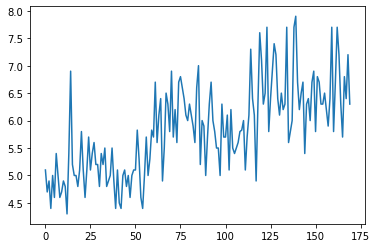

In [22]:
data["SepalLengthCm"].plot()

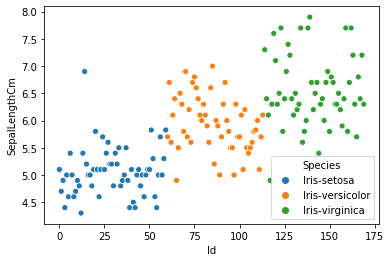

In [24]:
sns.scatterplot(data=data,x="Id",y="SepalLengthCm",hue="Species")

In [25]:
## hue = sınıflara göre ayırıyor

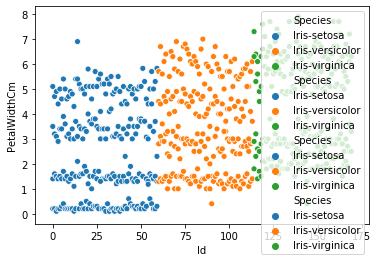

In [28]:
for column in data.columns[1:-1]:
    sns.scatterplot(data=data,x="Id",y=data[column],hue="Species")

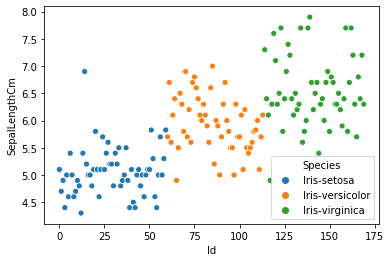

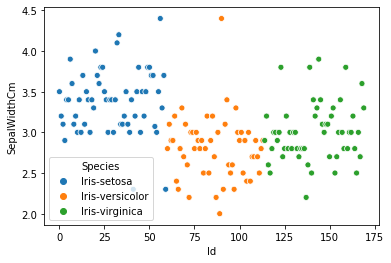

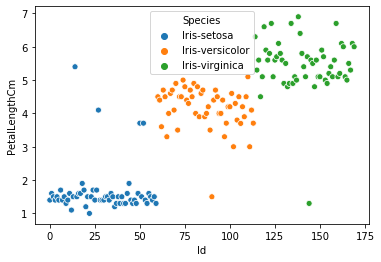

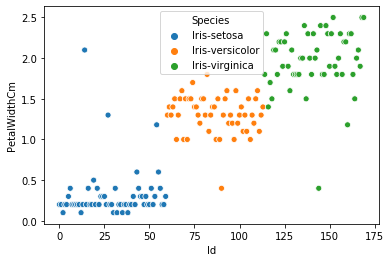

In [29]:
for column in data.columns[1:-1]:
    sns.scatterplot(data=data,x="Id",y=data[column],hue="Species")
    plt.show()  ## Görüntülerin tek tek olmasını sağlıyor

## Outlier Detection

### 3 Sigma(3 Standart Sapma)

Verinin dağılımı içerisinde ortalamadan kaç standart sapma uzağında durduğuna karar veriyoruz.

In [32]:
selected_spec= data[data.Species=="Iris-setosa"]
selected_column = selected_spec.SepalLengthCm

In [33]:
std= selected_column.std()
avg=selected_column.mean()

In [34]:
three_sigma_plus = avg +(3*std)
three_sigma_minus= avg - (3*std)

In [37]:
selected_column[((selected_spec["SepalLengthCm"] > three_sigma_plus) | (selected_spec["SepalLengthCm"] < three_sigma_minus))].index

Int64Index([14], dtype='int64')

In [42]:
## Loopla

for column in data.columns[1:-1]:
    for spec in data["Species"].unique():
        selected_spec= data[data.Species ==spec]
        selected_column =selected_spec[column]
        
        std=selected_column.std()
        avg=selected_column.mean()
        
        three_sigma_plus=avg + (3+ std)
        three_sigma_minus= avg- (3-std)
        
        outliers =selected_column[((selected_spec[column] > three_sigma_plus) | (selected_spec[column] < three_sigma_minus))].index
        data.drop(index=outliers,inplace=True)
        
        print(outliers,spec,column)

Int64Index([], dtype='int64') Iris-setosa SepalLengthCm
Int64Index([], dtype='int64') Iris-versicolor SepalLengthCm
Int64Index([], dtype='int64') Iris-virginica SepalLengthCm
Int64Index([], dtype='int64') Iris-setosa SepalWidthCm
Int64Index([], dtype='int64') Iris-versicolor SepalWidthCm
Int64Index([], dtype='int64') Iris-virginica SepalWidthCm
Int64Index([14], dtype='int64') Iris-setosa PetalLengthCm
Int64Index([90], dtype='int64') Iris-versicolor PetalLengthCm
Int64Index([144], dtype='int64') Iris-virginica PetalLengthCm
Int64Index([], dtype='int64') Iris-setosa PetalWidthCm
Int64Index([], dtype='int64') Iris-versicolor PetalWidthCm
Int64Index([], dtype='int64') Iris-virginica PetalWidthCm


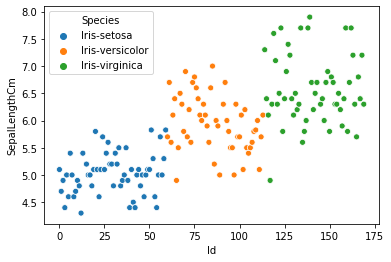

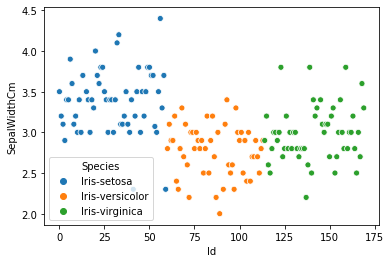

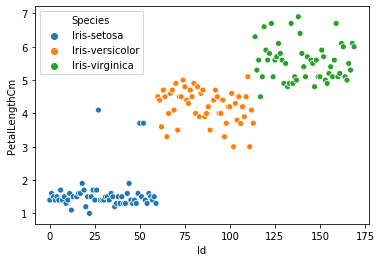

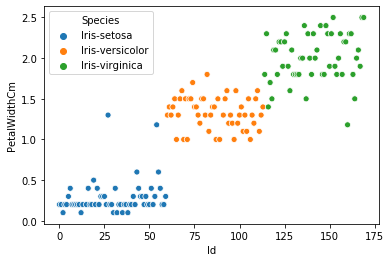

In [43]:
for column in data.columns[1:-1]:
    sns.scatterplot(data=data,x="Id",y=data[column],hue="Species")
    plt.show()  ## Görüntülerin tek tek olmasını sağlıyor

### IQR- Quantile

In [46]:
for column in data.columns[1:-1]:
    for spec in data["Species"].unique():
        selected_spec= data[data.Species ==spec]
        selected_column =selected_spec[column]
        Q1 = selected_column.quantile(0.25)
        Q3 = selected_column.quantile(0.75)
        IQR = Q3-Q1
        IQR_plus = Q3 +(1.5 * IQR)
        IQR_minus= Q1 - (1.5* IQR)
        outliers =selected_column[((selected_spec[column] > IQR_plus) | (selected_spec[column] < IQR_minus))].index
        data.drop(index=outliers,inplace=True)

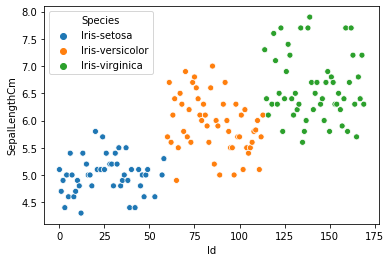

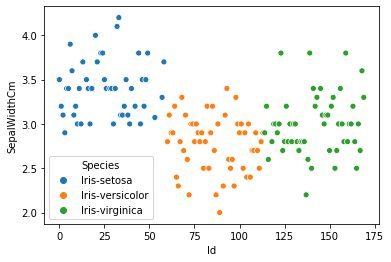

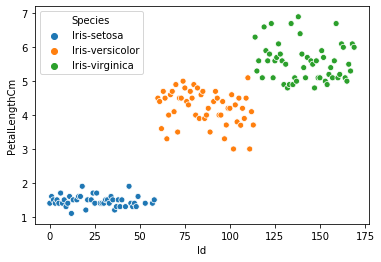

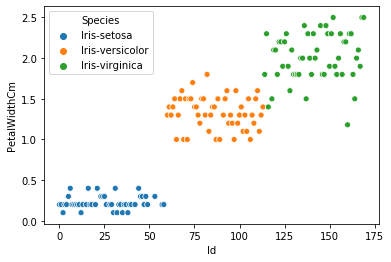

In [47]:
for column in data.columns[1:-1]:
    sns.scatterplot(data=data,x="Id",y=data[column],hue="Species")
    plt.show()  ## Görüntülerin tek tek olmasını sağlıyor

In [48]:
data.to_csv("final_data.csv",index=False)